# **Random Forest Regression on the California Housing dataset**



**Importing all the required libraries.**

In [1]:
#The sklearn.ensemble module includes the RandomForest algorithm.
from sklearn.ensemble import RandomForestRegressor

# Libraries for calculating evaluation metrics
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing_data = fetch_california_housing()

In [3]:
print(housing_data.keys())
print(housing_data.data.shape)
print(housing_data.DESCR)

print(pd.DataFrame(housing_data.data)[:5])
print(pd.DataFrame(housing_data.target)[:5])


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per censu

**Split the Dataset**

In [4]:
from pandas.core.common import random_state
X = housing_data.data
y = housing_data.target


##### Use numpy arrays ######
X_train = None
y_train = None
X_test = None
y_test = None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

assert X_train.shape == (14448, 8)
assert y_train.shape == (14448,)
assert X_test.shape == (6192, 8)
assert y_test.shape == (6192,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")


Size of training data=  14448  Samples
Size of testing data=  6192  Samples


**Fit model to training data**

In [5]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**Try Predicting Values**
Change values of features to see changes in the predicted value of house

In [6]:
# this is an example test case depicting how the prediction is done on a test data point.

val1 = 8.3252
val2 = 41.0
val3 = 6.984127
val4 = 1.023810
val5 = 322.0
val6 = 2.555556
val7 = 37.88
val8 = -122.23

row = [[val1, val2, val3, val4, val5, val6, val7, val8]]

# make a single prediction
yhat = model.predict(row)

print('House Value Prediction= $',yhat[0]*100000)

House Value Prediction= $ 443904.09000000043


**Testing the model**

In [7]:
y_pred = None
y_pred = model.predict(X_test)

**Visualize the Results**

In [8]:
mse = None
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ",mse)

Mean Squared Error =  0.27443212441750414


**Hyperparameter Tuning**

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = [{
     'n_estimators': [10, 50, 100, 150, 200], 
     'max_features': [4, 5, 6, 7, 8], 
     'max_depth': [6, 7, 8, 9, 10]
    }
]

#Use Random Forests
forest_reg = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [6, 7, 8, 9, 10],
                          'max_features': [4, 5, 6, 7, 8],
                          'n_estimators': [10, 50, 100, 150, 200]}],
             scoring='neg_mean_squared_error')

In [11]:
# Display the best parameter combination
grid_search.best_params_

{'max_depth': 10, 'max_features': 4, 'n_estimators': 50}

In [12]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after hyperparameter tuning = ", mse)

Mean Squared Error after hyperparameter tuning and cross-validation =  0.30193622375891555


**Retrain the model using only the top 5 features**

In [13]:
# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and select top 5
top5_feature_indices = np.argsort(feature_importances)[::-1][:5]

#print top 5 import features
print("Top 5 important features:")
for i in top5_feature_indices:
    print(housing_data.feature_names[i])

# Retrain the model using only the top 5 features
X_train_top_features = X_train[:, top5_feature_indices]
X_test_top_features = X_test[:, top5_feature_indices]

model.fit(X_train_top_features, y_train)
y_pred = model.predict(X_test_top_features)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error after feature selection = ", mse)

Top 5 important features:
MedInc
AveOccup
Longitude
Latitude
HouseAge
Mean Squared Error after feature selection =  0.2689324782923081


**Plot Learning Curve and Calculate Scores**

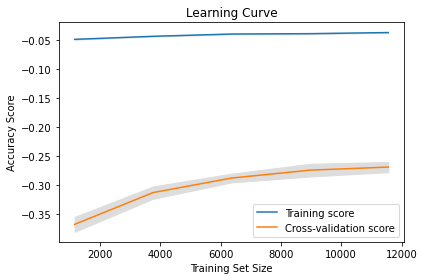

In [14]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# Get learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

We will take a closer look at some of the hyperparameters we should consider tuning for the random forest ensemble and their effect on model performance.

We select the hyperparameters that give us the lowest error rate or Mean Square Error in this case.

First we define a function to evaluate a model using the mean square error metric.

In [15]:
def find_mse(model, X, y):

  yhat = model.predict(X)
  mse = mean_squared_error(y,yhat) 

  return mse

Next we define a function to test out various models and plot how the Mean Square Error evolves with respect to the hyperparameter in question.

In [16]:
from matplotlib import pyplot

def plot_tuning(models_dict,X_train,X_test,y_train,y_test):

  results, names = list(), list()

  for name, model in models_dict.items():

    model.fit(X_train, y_train)
    mse = find_mse(model, X_test, y_test)
  
    results.append(mse)
    names.append(name)
    print("Hyperparameter= ",name,"; MSE = ",mse)


    n = [float(i) for i in names]

  pyplot.plot(n,results)
  pyplot.ylabel('Mean Square Error')
  pyplot.xlabel('Hyperparameter')
  pyplot.show()

**Hyperparameter:** max_samples.

The **max_samples** argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the sample used to train each decision tree. **None** means that the entire training set will be used to train each tree.

In [17]:
#Store various models into a dictionary of models
models_dict = dict()
for i in np.arange(0.1, 1.1, 0.1):
  # set max_samples=None to use 100%
  key = round(i,2)
  if i == 1.0:
    i = None
  models_dict[key] = RandomForestRegressor(max_samples=i)
  

Hyperparameter=  0.1 ; MSE =  0.3278915991521364
Hyperparameter=  0.2 ; MSE =  0.3032539412090529
Hyperparameter=  0.3 ; MSE =  0.29068254951409184
Hyperparameter=  0.4 ; MSE =  0.28492219353534304
Hyperparameter=  0.5 ; MSE =  0.28364586216995735
Hyperparameter=  0.6 ; MSE =  0.2786640955772772
Hyperparameter=  0.7 ; MSE =  0.27727019424082183
Hyperparameter=  0.8 ; MSE =  0.2794761171326126
Hyperparameter=  0.9 ; MSE =  0.2752175083353797
Hyperparameter=  1.0 ; MSE =  0.27400511640485703


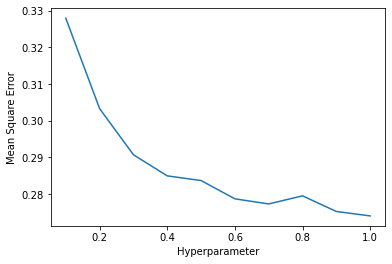

In [18]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** max_features.

The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

In [19]:
#Store various models into a dictionary of models
models_dict = dict()

for i in range(1,8):
  models_dict[str(i)] = RandomForestRegressor(max_features=i)


Hyperparameter=  1 ; MSE =  0.29264409848658274
Hyperparameter=  2 ; MSE =  0.25334710166388824
Hyperparameter=  3 ; MSE =  0.25231973469604024
Hyperparameter=  4 ; MSE =  0.25683867288018675
Hyperparameter=  5 ; MSE =  0.2626230557828351
Hyperparameter=  6 ; MSE =  0.2668747508392895
Hyperparameter=  7 ; MSE =  0.2723659539205805


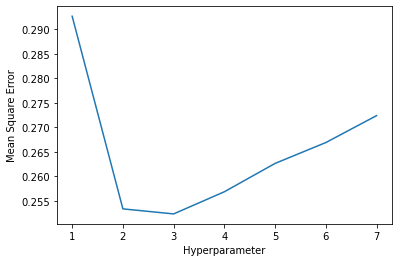

In [20]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)

**Hyperparameter:** n_estimators.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case.

In [21]:
#Store various models into a dictionary of models
models_dict = dict()

n_trees = [10, 50, 100, 500, 1000]
for n in n_trees:
    models_dict[str(n)] = RandomForestRegressor(n_estimators=n)

Hyperparameter=  10 ; MSE =  0.30555021822522366
Hyperparameter=  50 ; MSE =  0.27806161763365483
Hyperparameter=  100 ; MSE =  0.2749574889890128
Hyperparameter=  500 ; MSE =  0.2723937651948808
Hyperparameter=  1000 ; MSE =  0.2725743594723293


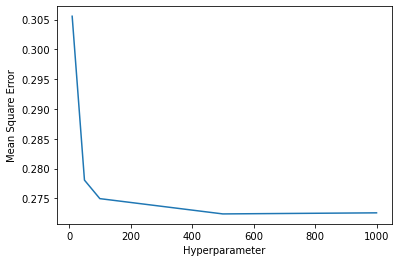

In [22]:
#Plot the MSE for all models in the dictionary
plot_tuning(models_dict,X_train,X_test,y_train,y_test)